In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [129]:
df=pd.read_excel("Bank Salaries.xlsx")

In [130]:
df

,Employee,Education,Grade,Years1,Years2,Age,Gender,PC Job,Salary
0,1,3,1,3,1,26,Male,No,32000.0
1,2,1,1,14,1,38,Female,No,39100.0
2,3,1,1,12,0,35,Female,No,33200.0
3,4,2,1,8,7,40,Female,No,30600.0
4,5,3,1,3,0,28,Male,No,29000.0
...,...,...,...,...,...,...,...,...,...
203,204,3,6,34,0,60,Male,No,95000.0
204,205,5,6,36,0,61,Male,No,97000.0
205,206,5,6,32,0,62,Male,No,88000.0
206,207,5,6,35,0,59,Male,No,94000.0


# Univariate Analysis

<AxesSubplot:>

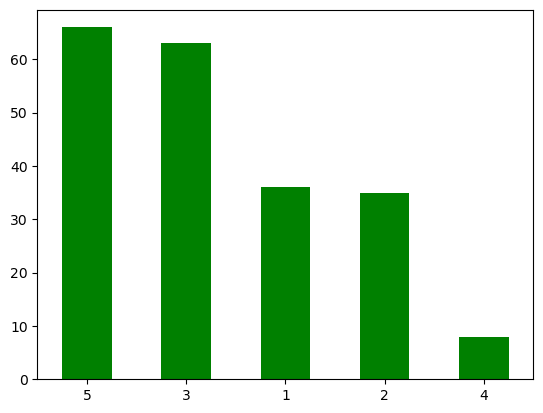

In [50]:
df["Education"].value_counts().plot(kind='bar',rot=0,color="g")

In [51]:
df["Education"].value_counts()

5    66
3    63
1    36
2    35
4     8
Name: Education, dtype: int64

<AxesSubplot:>

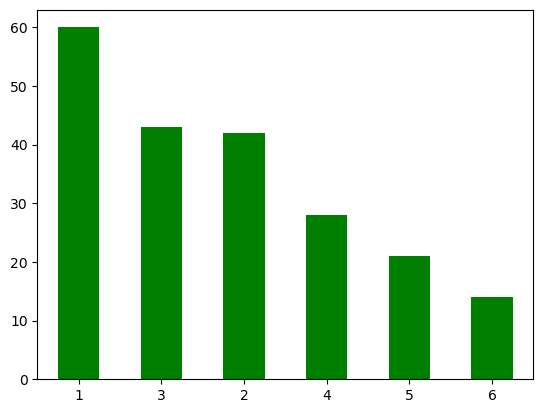

In [52]:
df["Grade"].value_counts().plot(kind='bar',rot=0,color="g")

<AxesSubplot:>

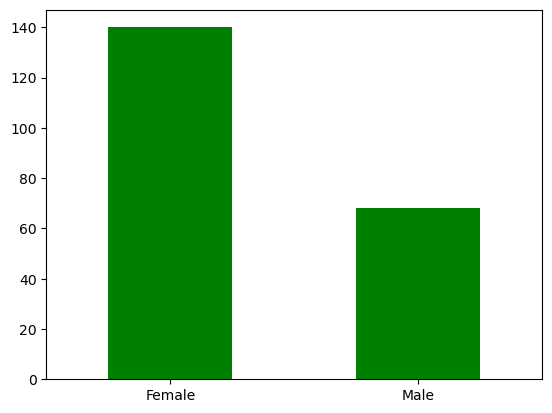

In [53]:
df["Gender"].value_counts().plot(kind='bar',rot=0,color="g")

<AxesSubplot:>

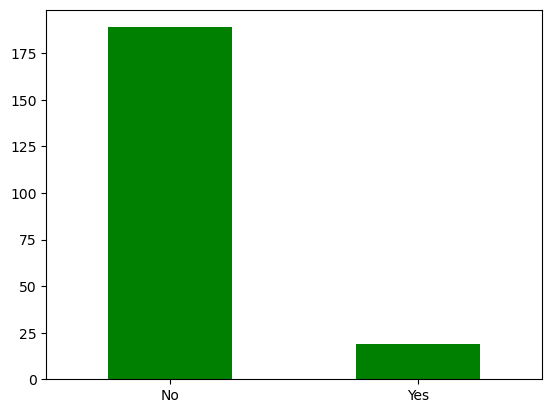

In [54]:
df["PC Job"].value_counts().plot(kind='bar',rot=0,color="g")

In [55]:
df[["PC Job"]].value_counts()

PC Job
No        189
Yes        19
dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Density'>

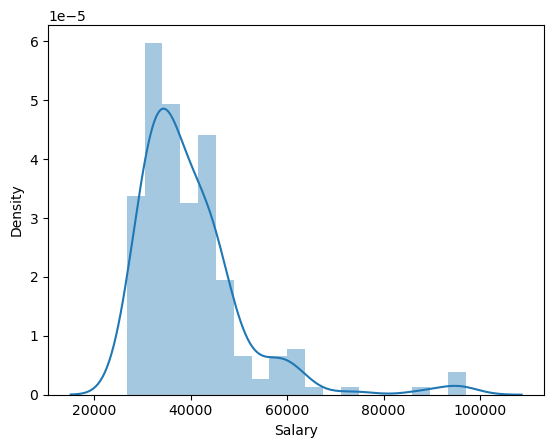

In [56]:
sns.distplot(df['Salary'], hist=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

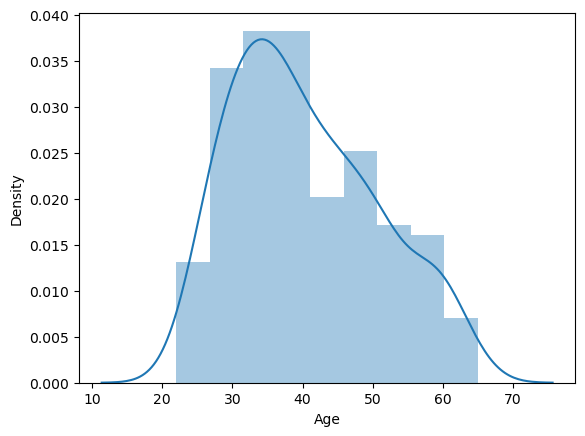

In [57]:
sns.distplot(df['Age'], hist=True)

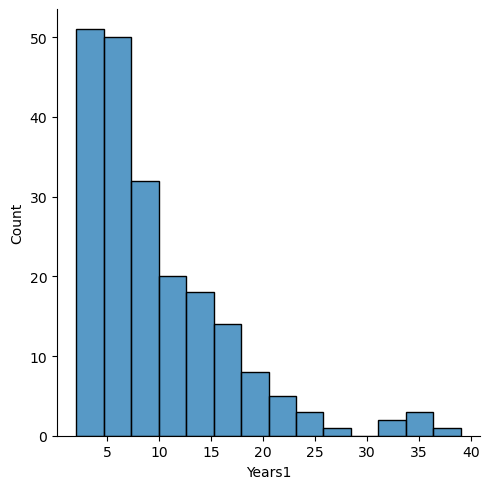

In [58]:
sns.displot(df["Years1"])

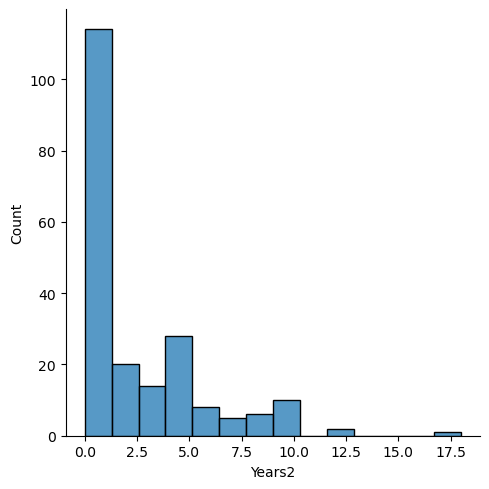

In [59]:
sns.displot(df["Years2"])

## Bivariate Analysis:

### Education and Salary

<BarContainer object of 5 artists>

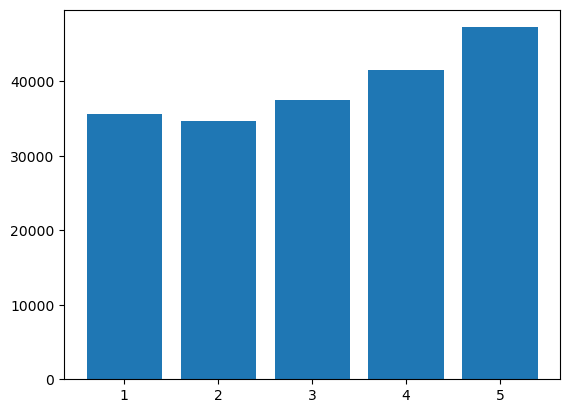

In [60]:
avg_salary = df.groupby('Education')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

There is a slow gradual rise in average salary as the Education level increases

### Grade and Salary

<BarContainer object of 6 artists>

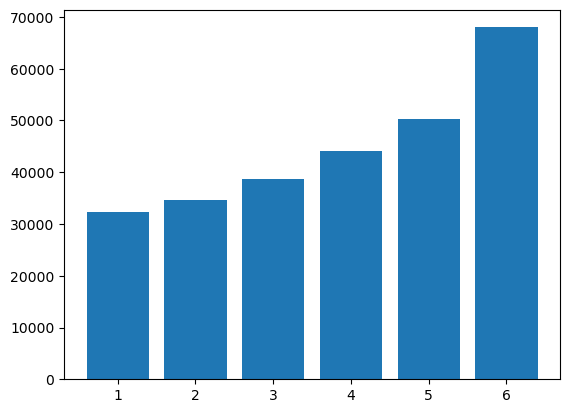

In [61]:
avg_salary = df.groupby('Grade')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

The salary increases with increase in grade.

In [62]:
df[["Years1","Salary"]].corr()

,Years1,Salary
Years1,1.00000,0.61561
Salary,0.61561,1.00000


<AxesSubplot:xlabel='Years1', ylabel='Salary'>

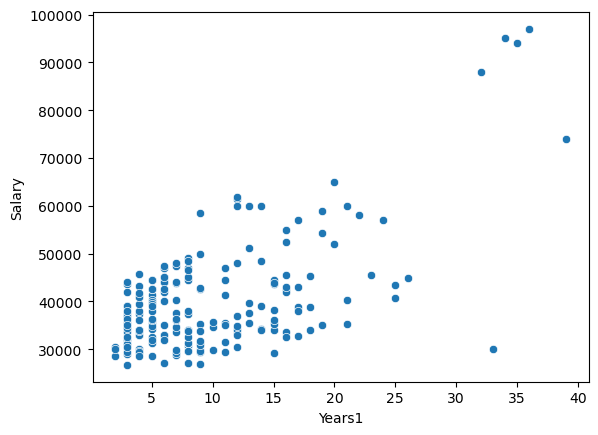

In [63]:
sns.scatterplot(x=df["Years1"], y=df["Salary"])

In [64]:
df[['Age',"Salary"]].corr()

,Age,Salary
Age,1.000000,0.383798
Salary,0.383798,1.000000


<AxesSubplot:xlabel='Age', ylabel='Salary'>

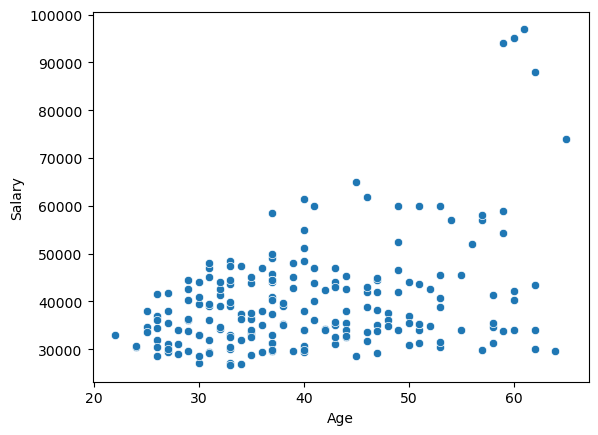

In [65]:
sns.scatterplot(x=df["Age"], y=df["Salary"])

### Gender and Salary

<BarContainer object of 2 artists>

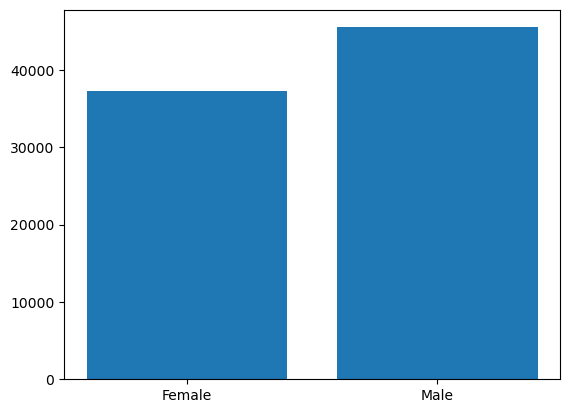

In [66]:
avg_salary = df.groupby('Gender')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

In [67]:
df.groupby('Gender')['Salary'].mean()

Gender
Female    37209.928571
Male      45505.441176
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Years2', ylabel='Salary'>

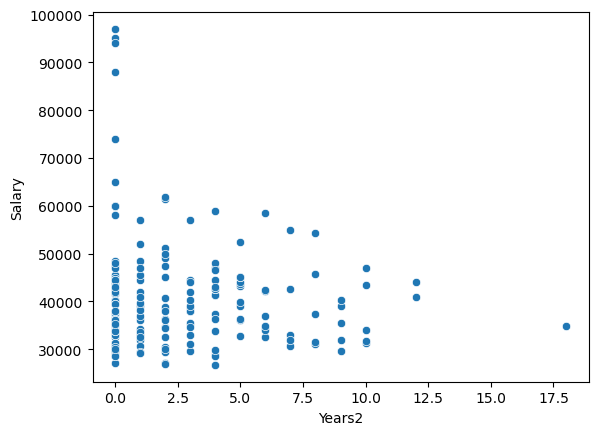

In [68]:
sns.scatterplot(x=df["Years2"], y=df["Salary"])

<BarContainer object of 2 artists>

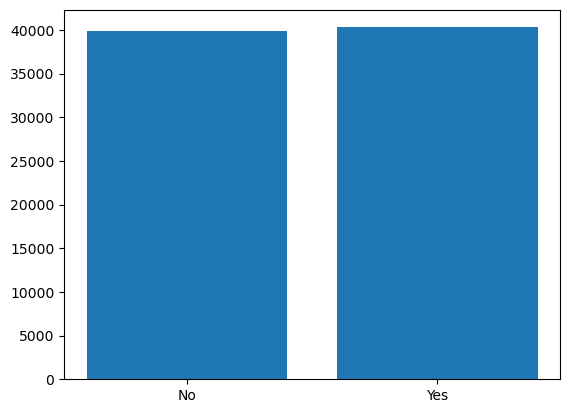

In [69]:
avg_salary = df.groupby('PC Job')['Salary'].mean()

# Create the bar plot using matplotlib
plt.bar(avg_salary.index, avg_salary.values)

There is no difference in averag salary for PC Job 

In [70]:
df.groupby('PC Job')['Salary'].mean()

PC Job
No     39883.386243
Yes    40305.263158
Name: Salary, dtype: float64

### Mulitvariate Analysis

In [71]:
df.pivot_table(index=['Grade'],columns=["Gender"], values=['Salary'], aggfunc=np.mean).round(0)

Salary         
Gender   Female     Male
Grade                   
1       32649.0  31079.0
2       34865.0  34217.0
3       38536.0  39329.0
4       44351.0  43845.0
5       51100.0  49750.0
6       30000.0  70923.0

In [72]:
df.pivot_table(index=['Grade'], values=['Salary'], aggfunc=np.mean).round(0)

,Salary
Grade,
1,32335.0
2,34665.0
3,38665.0
4,44152.0
5,50329.0
6,68000.0


Men and women have similar level in average salaries across all education levels expect at level 6 where men have a very high average salary.

At Grade 6 men are getting salary way higher than women.

In [73]:
df.pivot_table(index=['Education'],columns=["Gender"], values=['Salary'], aggfunc='mean')

Salary              
Gender           Female          Male
Education                            
1          35176.060606  39933.333333
2          35131.034483  31970.000000
3          36716.279070  39247.500000
4          39500.000000  44666.666667
5          41782.666667  51772.222222

In [74]:
df.pivot_table(index=['Education'], values=['Salary'], aggfunc='mean')

,Salary
Education,
1,35572.500000
2,34589.142857
3,37519.841270
4,41437.500000
5,47231.515152


Male are having higher average salary than the overall average salary. whereas women average salary is less than or equeal to the overall average salary

### Scatter plot for male years1 and salary

In [75]:
male=df["Gender"]=="Male"
male=df[male]
male[["Years1","Salary"]].corr()

,Years1,Salary
Years1,1.000000,0.887698
Salary,0.887698,1.000000


<AxesSubplot:xlabel='Years1', ylabel='Salary'>

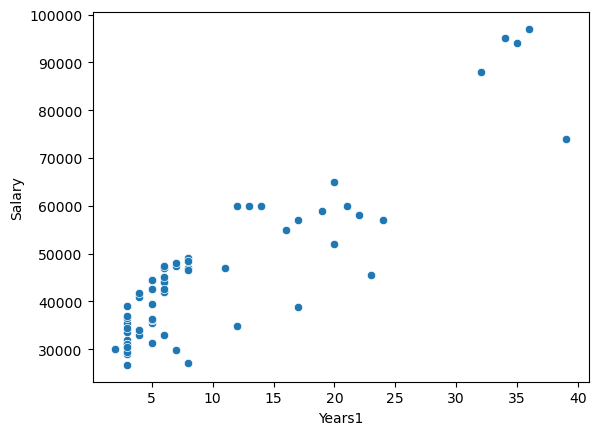

In [76]:
sns.scatterplot(x=male["Years1"], y=male["Salary"])

In [77]:
female=df["Gender"]=="Female"
female=df[female]
female[["Years1","Salary"]].corr()

,Years1,Salary
Years1,1.000000,0.235411
Salary,0.235411,1.000000


<AxesSubplot:xlabel='Years1', ylabel='Salary'>

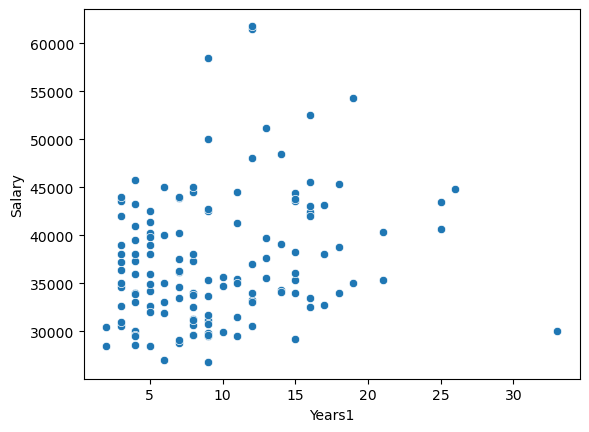

In [78]:
sns.scatterplot(x=female["Years1"], y=female["Salary"])

In [79]:
male=df["Gender"]=="Male"
male=df[male]
male[["Age","Salary"]].corr()

,Age,Salary
Age,1.000000,0.660464
Salary,0.660464,1.000000


<AxesSubplot:xlabel='Age', ylabel='Salary'>

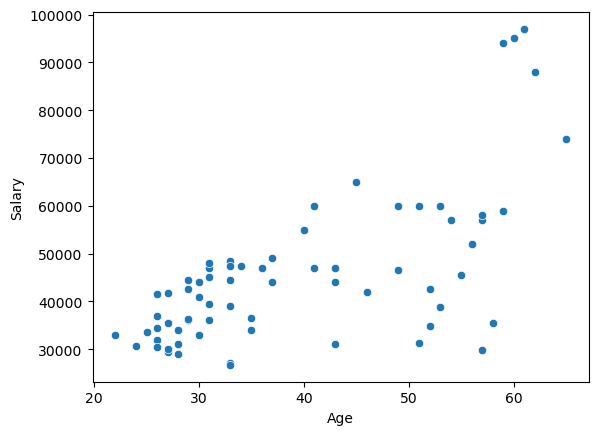

In [80]:
sns.scatterplot(x=male["Age"], y=male["Salary"])

In [81]:
Female=df["Gender"]=="Female"
Female=df[Female]
Female[["Age","Salary"]].corr()

,Age,Salary
Age,1.000000,0.137023
Salary,0.137023,1.000000


<AxesSubplot:xlabel='Age', ylabel='Salary'>

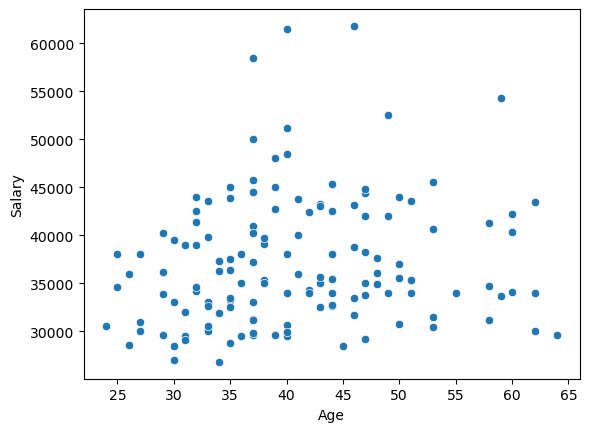

In [82]:
sns.scatterplot(x=Female["Age"], y=Female["Salary"])

Male's Age has a better correlation with salary compared to the female's age

### Age,Grade and Salary

In [83]:
df.pivot_table(index=['Grade'],columns=["Gender"] ,values=['Age','Salary'], aggfunc=np.mean)

Age                   Salary              
Gender     Female       Male        Female          Male
Grade                                                   
1       40.458333  35.833333  32649.166667  31079.166667
2       40.034483  32.538462  34865.172414  34216.923077
3       40.361111  33.571429  38535.555556  39328.571429
4       43.294118  36.000000  44350.588235  43845.454545
5       41.111111  39.666667  51100.000000  49750.000000
6       62.000000  55.230769  30000.000000  70923.076923

In [84]:
df.pivot_table(index=['Grade'],values=['Salary'], aggfunc=np.mean)

,Salary
Grade,
1,32335.166667
2,34664.523810
3,38664.651163
4,44152.142857
5,50328.571429
6,68000.000000


The average salary for women and men is similar to the overall average salary for men and women combined. But the age of women in each education level is higher when compared to that of men whom are recieving similar level of salaries.

Is there a significant difference in salary for grades

#### PC Job, Gender and Salary

In [85]:
df.pivot_table(index=['PC Job'],columns=["Gender"] ,values=['Salary'], aggfunc=np.mean)

Salary              
Gender        Female          Male
PC Job                            
No      36723.884298  45505.441176
Yes     40305.263158           NaN

In [86]:
one=df[df["Grade"]==1]
two=df[df["Grade"]==2]
three=df[df["Grade"]==3]
four=df[df["Grade"]==4]
five=df[df["Grade"]==5]
six=df[df["Grade"]==6]

* **H0:**There is no signigicant difference in salary accross all Grades
* **H1:**THere is significant differnece in salary for alteast one grade

In [87]:
f_oneway(one["Salary"],two["Salary"],three["Salary"],four["Salary"],five["Salary"],six["Salary"])

F_onewayResult(statistic=96.63593130412356, pvalue=1.2308833620708183e-51)

The p value is less than alpha so we reject h0 that there is no signigicant difference in salary accross all Grades

### Is there a significant difference in salary for jobs related to computer and non computer

In [88]:
yes=df[df["PC Job"]=="No"]
no=df[df["PC Job"]=="Yes"]

* **H0:** There is no significant difference in salary among PC Jobs
* **H1:** There is significant difference in salary

In [89]:
f_oneway(yes["Salary"],no["Salary"])

F_onewayResult(statistic=0.02413744542951999, pvalue=0.8766878273046056)

The p value is greater than alpha so we can reject null hypothesis and accept null hypotheses that there is no significant difference in salary for differnet PC jobs.

### Is there a significant difference in education level and salary

In [90]:
one=df[df["Education"]==1]
two=df[df["Education"]==2]
three=df[df["Education"]==3]
four=df[df["Education"]==4]
five=df[df["Education"]==5]

* **H0:** There is no signigicant difference in salary across all Education levels
* **H1:** THere is significant differnece in salary for alteast one eduacation level

In [91]:
f_oneway(one["Salary"],two["Salary"],three["Salary"],four["Salary"],five["Salary"])

F_onewayResult(statistic=13.730011731533411, pvalue=6.301811369525473e-10)

The p value is less than alpha so we reject H0 and state that there is significant difference in salary for atleast one education level.

### Is there a significant difference in grade level and salary

In [92]:
one=df[df["Grade"]==1]
two=df[df["Grade"]==2]
three=df[df["Grade"]==3]
four=df[df["Grade"]==4]
five=df[df["Grade"]==5]
six=df[df["Grade"]==6]

* **H0:** There is no signigicant difference in salary across all Grade levels
* **H1:** THere is significant differnece in salary for alteast one Grade level

In [93]:
f_oneway(one["Salary"],two["Salary"],three["Salary"],four["Salary"],five["Salary"],six["Salary"])

F_onewayResult(statistic=96.63593130412356, pvalue=1.2308833620708183e-51)

The p value is less than alpha so we reject H0 and state that there is significant difference in salary for atleast one level of grade.

### Is significant difference in mean of salary for male and female

In [94]:
male=df[df["Gender"]=="Male"]
male[["Salary"]]
female=df[df["Gender"]=="Female"]
female[["Salary"]]
f_oneway(male["Salary"],female["Salary"])

F_onewayResult(statistic=28.115061001620237, pvalue=2.9354470815211695e-07)

* **H0:** There is no signigicant difference in salary for genders
* **H1:** THere is significant differnece in salary for the genders

p value is less than alpha so we reject Null Hypothesis stating that there is significant difference in the saalry for genders.

In [95]:
df_scale=df

In [96]:
e=df[["PC Job"]]
encode=OneHotEncoder()
n=encode.fit_transform(e)
n.toarray()
encode.get_feature_names_out()
encode=pd.DataFrame(n.toarray(),columns=encode.get_feature_names_out())

In [97]:
df_scale.drop(columns="PC Job",inplace=True)

In [98]:
df_scale=pd.concat([df_scale,encode],axis=1)

In [99]:
df_scale

,Employee,Education,Grade,Years1,Years2,Age,Gender,Salary,PC Job_No,PC Job_Yes
0,1,3,1,3,1,26,Male,32000.0,1.0,0.0
1,2,1,1,14,1,38,Female,39100.0,1.0,0.0
2,3,1,1,12,0,35,Female,33200.0,1.0,0.0
3,4,2,1,8,7,40,Female,30600.0,1.0,0.0
4,5,3,1,3,0,28,Male,29000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
203,204,3,6,34,0,60,Male,95000.0,1.0,0.0
204,205,5,6,36,0,61,Male,97000.0,1.0,0.0
205,206,5,6,32,0,62,Male,88000.0,1.0,0.0
206,207,5,6,35,0,59,Male,94000.0,1.0,0.0


In [100]:
df_scale["Gender"].replace({"Male":0,"Female":1},inplace=True)

In [101]:
df_scale.drop(columns="Employee",inplace=True)

In [102]:
df_scale

,Education,Grade,Years1,Years2,Age,Gender,Salary,PC Job_No,PC Job_Yes
0,3,1,3,1,26,0,32000.0,1.0,0.0
1,1,1,14,1,38,1,39100.0,1.0,0.0
2,1,1,12,0,35,1,33200.0,1.0,0.0
3,2,1,8,7,40,1,30600.0,1.0,0.0
4,3,1,3,0,28,0,29000.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
203,3,6,34,0,60,0,95000.0,1.0,0.0
204,5,6,36,0,61,0,97000.0,1.0,0.0
205,5,6,32,0,62,0,88000.0,1.0,0.0
206,5,6,35,0,59,0,94000.0,1.0,0.0


### Fitted a linear regression model with gender only

In [103]:
y=df_scale[["Salary"]]
X=df_scale[["Gender"]]
X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     28.12
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           2.94e-07
Time:                        10:51:31   Log-Likelihood:                -2221.7
No. Observations:                 208   AIC:                             4447.
Df Residuals:                     206   BIC:                             4454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.551e+04   1283.530     35.453      0.000     4.3e+04     4.8e+04
Gender     -8295.5126   1564.493     -5.302      0.000   -1.14e+04   -5211.041
==============================================================================
Omnibus:                      106.281   Durbin-Watson:                   0.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.694
Skew:                           1.985   Prob(JB):                    2.36e-118
Kurtosis:                       9.837   Cond. No.                         3.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fitted a linear regression model with Gender ,Education Level ,Age,Years1,Grade

In [104]:
y=df_scale[["Salary"]]
X=df_scale[["Gender","Education","Age","Years1","Grade"]]
X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     107.9
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           4.34e-55
Time:                        10:51:31   Log-Likelihood:                -2099.7
No. Observations:                 208   AIC:                             4211.
Df Residuals:                     202   BIC:                             4232.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.173e+04   2443.416      8.895      0.000    1.69e+04    2.66e+04
Gender     -2966.2565    964.363     -3.076      0.002   -4867.767   -1064.746
Education    997.9834    405.281      2.462      0.015     198.860    1797.107
Age           36.4128     56.562      0.644      0.520     -75.116     147.941
Years1       612.9408     90.629      6.763      0.000     434.241     791.640
Grade       3490.5142    419.569      8.319      0.000    2663.217    4317.812
==============================================================================
Omnibus:                       50.875   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              994.844
Skew:                           0.060   Prob(JB):                    9.38e-217
Kurtosis:                      13.713   Cond. No.                         260.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The interaction effect of grade with gender on salary. 

In [137]:
df_scale=df
df_scale["Gender"].replace({"Male":-1,"Female":1},inplace=True)
encoder=OneHotEncoder()
encode=encoder.fit_transform(df_scale[["Grade"]])
encode=pd.DataFrame(encode.toarray(),columns=encoder.get_feature_names_out())
df_scale=pd.concat([df_scale,encode],axis=1)
df_scale.drop(columns="Grade",inplace=True)
df_scale['Grade_1']=df_scale['Grade_1']*df_Scale["Gender"]
df_scale['Grade_2']=df_scale['Grade_2']*df_Scale["Gender"]
df_scale['Grade_3']=df_scale['Grade_3']*df_Scale["Gender"]
df_scale['Grade_4']=df_scale['Grade_4']*df_Scale["Gender"]
df_scale['Grade_5']=df_scale['Grade_5']*df_Scale["Gender"]
df_scale['Grade_6']=df_scale['Grade_6']*df_Scale["Gender"]
y=df_scale[["Salary"]]
X=df_scale[['Years1', 'Years2', 'Age', 'Grade_1', 'Grade_2', 'Grade_3','Grade_4', 'Grade_5',"Grade_6"]]
X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     35.86
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           4.54e-37
Time:                        11:57:42   Log-Likelihood:                -2134.4
No. Observations:                 208   AIC:                             4289.
Df Residuals:                     198   BIC:                             4322.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.57e+04   2243.167     15.914      0.000    3.13e+04    4.01e+04
Years1       999.3602    105.097      9.509      0.000     792.107    1206.614
Years2       -26.0480    168.361     -0.155      0.877    -358.059     305.963
Age           -0.0340     69.271     -0.000      1.000    -136.638     136.570
Grade_1     -1.21e+04   1346.818     -8.983      0.000   -1.48e+04   -9442.021
Grade_2    -8687.2920   1590.736     -5.461      0.000   -1.18e+04   -5550.333
Grade_3    -5848.5034   1479.753     -3.952      0.000   -8766.602   -2930.404
Grade_4    -4087.6427   1942.914     -2.104      0.037   -7919.103    -256.183
Grade_5     3597.4398   2527.630      1.423      0.156   -1387.092    8581.971
Grade_6    -3.867e+04   7351.614     -5.261      0.000   -5.32e+04   -2.42e+04
==============================================================================
Omnibus:                       15.443   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.262
Skew:                           0.454   Prob(JB):                     8.89e-06
Kurtosis:                       4.364   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients of the grade when combined with gender shows that the effect of male causes the salary for every grade to increase and the effect of female on grade causes the salary to decrease. (except for grade 5 )

### The Interaction effect of Education with Gender on salary. 

In [135]:
df_scale=df
df_scale["Gender"].replace({"Male":-1,"Female":1},inplace=True)
encoder=OneHotEncoder()
encode=encoder.fit_transform(df_scale[["Education"]])
encode=pd.DataFrame(encode.toarray(),columns=encoder.get_feature_names_out())
df_scale=pd.concat([df_scale,encode],axis=1)
df_scale.drop(columns="Grade",inplace=True)
df_scale['Education_1']=df_scale['Education_1']*df_Scale["Gender"]
df_scale['Education_2']=df_scale['Education_2']*df_Scale["Gender"]
df_scale['Education_3']=df_scale['Education_3']*df_Scale["Gender"]
df_scale['Education_4']=df_scale['Education_4']*df_Scale["Gender"]
df_scale['Education_5']=df_scale['Education_5']*df_Scale["Gender"]
y=df_scale[["Salary"]]
X=df_scale[['Years1', 'Years2', 'Age', 'Education_1', 'Education_2', 'Education_3','Education_4', 'Education_5']]
X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     33.68
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           3.44e-33
Time:                        11:52:20   Log-Likelihood:                -2146.0
No. Observations:                 208   AIC:                             4310.
Df Residuals:                     199   BIC:                             4340.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.393e+04   2448.090     13.858      0.000    2.91e+04    3.88e+04
Years1       1046.1227    107.435      9.737      0.000     834.265    1257.980
Years2        206.6102    177.067      1.167      0.245    -142.559     555.780
Age            21.3593     74.824      0.285      0.776    -126.191     168.909
Education_1 -1.238e+04   1617.499     -7.653      0.000   -1.56e+04   -9188.776
Education_2  -1.15e+04   1708.157     -6.730      0.000   -1.49e+04   -8128.063
Education_3 -7530.2191   1464.077     -5.143      0.000   -1.04e+04   -4643.123
Education_4 -5227.3632   3478.048     -1.503      0.134   -1.21e+04    1631.197
Education_5 -1573.0678   1649.127     -0.954      0.341   -4825.075    1678.940
==============================================================================
Omnibus:                       26.246   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.979
Skew:                          -0.206   Prob(JB):                     9.83e-29
Kurtosis:                       6.836   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients of the education when combined with gender shows that the effect of male causes the salary for every education level to increase and the effect of female on education level causes the salary to decrease.